<a href="https://colab.research.google.com/github/nferrucho/NPL/blob/main/curso3/ciclo3/Copia_de_M6U3_Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=14reVO1X6LsjqJ3cFgoeHxxddZVGfZn3t" alt = "Encabezado MLDS" width = "100%">  </img>

# **Taller 3: Ciclo de vida de ciencia de datos**
---

En este notebook evaluaremos los conceptos aprendidos sobre el ciclo de vida de ciencia de datos. En especial, entrenaremos un modelo con la librer√≠a `xgboost` con su debida optimizaci√≥n de hiperpar√°metros.

Ejecute las siguientes celdas para conectarse a UNCode:

In [1]:
!pip install rlxcrypt
!wget --no-cache -O session.pye -q https://raw.githubusercontent.com/JuezUN/INGInious/master/external%20libs/session.pye

  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 297.9/297.9 kB 18.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.3/2.3 MB 40.3 MB/s eta 0:00:00
  Created wheel for imphook: filename=imphook-1.0-py3-none-any.whl size=9423 sha256=0b860be8263c9c8cd37926ee94b14edd9700b0560224ab8cb2dc61dfa9e24bf1
  Stored in directory: /root/.cache/pip/wheels/dc/e2/a4/fcb3817d09a2eb047b2b08eb58e7d9140041b0f3f415eb1256
Successfully built imphook


In [2]:
import rlxcrypt
import session

grader = session.LoginSequence("MAPEDDACML-GroupMLDS-6-2024-2@f8879e0a-fcd1-4b6b-a12f-31426dfcd762")

Please enter your UNCode username: nelson.ferrucho@gmail.com
Please enter your password: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


Comenzamos instalando las librer√≠as y herramientas necesarias:

In [3]:
!pip install mlflow
!pip install optuna optuna-dashboard mlflow xgboost
!pip install -U scikit-learn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 27.3/27.3 MB 52.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.8/5.8 MB 87.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 233.5/233.5 kB 15.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 147.8/147.8 kB 12.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 114.9/114.9 kB 9.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.0/85.0 kB 7.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

Importamos las librer√≠as necesarias:

In [4]:
# Librer√≠as de utilidad para manipulaci√≥n y visualizaci√≥n de datos.
import os, mlflow, optuna
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from IPython import get_ipython
from IPython.display import display
plt.style.use("ggplot")

# Ignorar warnings.
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Versiones de las librer√≠as usadas.
import sklearn
!python --version
print('MLflow', mlflow.__version__)
print('Optuna', optuna.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.10.12
MLflow 2.18.0
Optuna 4.1.0
Scikit-learn 1.5.2


Esta actividad se realiz√≥ con las siguientes versiones:
*  Python 3.10.12
*  Scikit-learn 1.4.2
*  MLflow 2.12.1
*  Optuna 3.6.1

> **La tarea es incremental, por lo tanto es recomendable resolver los puntos en orden**

## **Carga de datos**
---

En este caso, utilizaremos un conjunto de datos sint√©tico generado desde `sklearn`. Se trata de un *dataset* sint√©tico utilizado com√∫nmente para tareas de clasificaci√≥n binaria en aprendizaje autom√°tico. Este conjunto de datos consta de dos caracter√≠sticas continuas y una etiqueta binaria que indica a qu√© c√≠rculo pertenece cada punto.

Espec√≠ficamente, la funci√≥n `make_circles` crea un conjunto de puntos distribuidos uniformemente en dos c√≠rculos conc√©ntricos, donde la distancia entre los dos c√≠rculos es ajustable. La distribuci√≥n de puntos dentro de cada c√≠rculo se controla mediante el par√°metro `noise`, que agrega ruido aleatorio a la posici√≥n de cada punto.

En general, este conjunto de datos se utiliza para evaluar la capacidad de los algoritmos de clasificaci√≥n para separar clases no lineales en un espacio bidimensional. Debido a que los dos c√≠rculos se superponen, es imposible separar completamente las dos clases con una frontera de decisi√≥n lineal. Por lo tanto, se requieren t√©cnicas m√°s avanzadas, como la utilizaci√≥n de modelos no lineales, para clasificar adecuadamente los puntos en este conjunto de datos.

Vamos a generarlo:

In [6]:
features, labels = make_circles(
    n_samples=1000,
    noise=0.1,
    factor=0.5,
    random_state=0
    )

Podemos visualizar el conjunto de datos:

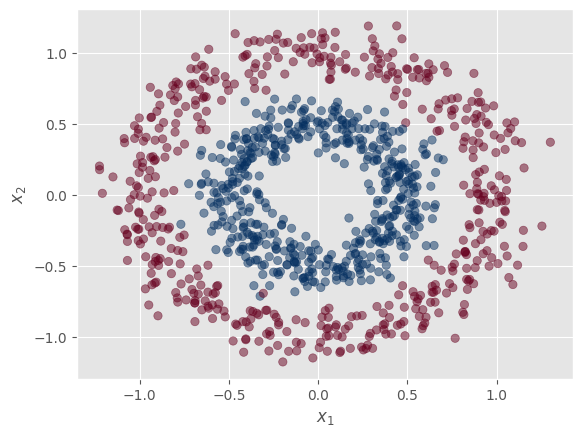

In [7]:
## KEEPOUTPUT
fig, ax = plt.subplots()
ax.scatter(features[:, 0], features[:, 1], c=labels, alpha=0.5, cmap="RdBu")
ax.set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

Adicionalmente, vamos a configurar el servidor de `mlflow`:

In [8]:
command = """
mlflow server \
        --backend-store-uri sqlite:///tracking.db \
        --default-artifact-root file:mlruns \
        -p 5000 &
"""
get_ipython().system_raw(command)

Utilizaremos `ngrok` para acceder al tablero de `mlflow`:

In [9]:
!pip install pyngrok

Ahora debe agregar su token de `ngrok`:

In [10]:
token = "2pK4C5bDe1buHeGQuaIutafJPuh_3f3nwzmCCQqU3fgbTDGYi" # Agregue el token dentro de las comillas
os.environ["NGROK_TOKEN"] = token

Nos autenticamos en ngrok:

In [11]:
!ngrok authtoken $NGROK_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Ahora, lanzamos la conexi√≥n con ngrok:

In [12]:
from pyngrok import ngrok
ngrok.connect(5000, "http")

<NgrokTunnel: "https://65c0-35-245-198-222.ngrok-free.app" -> "http://localhost:5000">

Especificamos que MLFlow debe usar el servidor que estamos manejando.

In [13]:
mlflow.set_tracking_uri("http://localhost:5000")

Creamos un experimento:

In [14]:
exp = mlflow.create_experiment(name="circles", artifact_location="mlruns")

Dividimos el conjunto de datos en entrenamiento y prueba:

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(
        features, labels, test_size=0.3, random_state=0
        )

## **1. Entrenamiento de Modelo**
---

En este punto deber√° implementar una funci√≥n que permita entrenar un modelo de `xgboost` dados los datos de entrenamiento y los hiperpar√°metros que explor√°remos m√°s adelante.

Para esto debe implementar la funci√≥n `train_model` la cual toma como entrada las caracter√≠sticas y etiquetas de entrenamiento, la profundidad de los √°rboles, el n√∫mero de estimadores, y la taza de aprendizaje. La funci√≥n debe retornar el modelo entrenado.

**Par√°metros**

- `features`: matriz de caracter√≠sticas de entrenamiento.
- `labels`: vector de etiquetas de entrenamiento.
- `max_depth`: profundidad m√°xima del √°rbol.
- `n_estimators`: n√∫mero de estimadores.
- `learning_rate`: taza de aprendizaje.
- `random_state`: semilla de n√∫meros aleatorios.

**Retorna**

- `model`: modelo de `xgboost` entrenado.

In [16]:
# FUNCI√ìN CALIFICADA train_model:
def train_model(
    features,
    labels,
    max_depth,
    n_estimators,
    learning_rate,
    random_state
    ):

    import xgboost as xgb
    ### ESCRIBA SU C√ìDIGO AQU√ç ###
    model = xgb.XGBClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=random_state,
        use_label_encoder=False,  # Evitar advertencias sobre codificaci√≥n de etiquetas
        eval_metric="logloss"    # M√©trica para clasificaciones binarias
    )
    model.fit(features, labels)
    return model
    ### FIN DEL C√ìDIGO ###

Use las siguientes celdas para probar su soluci√≥n:

In [17]:
#TEST_CELL
model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=2,
        n_estimators=10,
        learning_rate=1e-4,
        random_state=0
        )
print(model.max_depth)
print(model.n_estimators)
print(model.learning_rate)

2
10
0.0001


**Salida esperada**

En este caso deber√≠a obtener los hiperpar√°metros del modelo:

```python
‚ù± print(model.max_depth)
2

‚ù± print(model.n_estimators)
10

‚ù± print(model.learning_rate)
0.0001
```

In [18]:
#TEST_CELL
model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=2,
        n_estimators=10,
        learning_rate=1e-4,
        random_state=0
        )
print(model.score(features_test, labels_test))

0.48333333333333334


**Salida esperada**

En este caso deber√≠a obtener el accuracy del modelo:

```python
‚ù± print(model.score(features_test, labels_test))
0.48333333333333334
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Recuerde que `XGBClassifier` funciona de una forma equivalente a `sklearn`.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Valide que est√° usando los par√°metros de la funci√≥n y no las variables globales.
</details>

#### **Evaluar c√≥digo**

In [19]:
grader.run_test("Test 1_1", globals())

Test 1_1


## **2. Evaluaci√≥n del modelo**
---

En este punto debe implementar una funci√≥n que permita calcular el `f1_score` sobre el conjunto de evaluaci√≥n a partir de un modelo entrenado.

Para esto, debe implementar la funci√≥n `eval_model`, la cual toma como entrada un modelo entrenado, las caracter√≠sticas y el vector de etiquetas de evaluaci√≥n. Debe retornar el valor de la m√©trica.

**Par√°metros**

- `model`: modelo entrenado.
- `features`: conjunto de datos de evaluaci√≥n.
- `labels`: etiquetas de evaluaci√≥n.

**Retorna**

- `score`: f1-score.

In [20]:
# FUNCI√ìN CALIFICADA eval_model:
def eval_model(
    model,
    features,
    labels,
    ):
    from sklearn.metrics import f1_score
    ### ESCRIBA SU C√ìDIGO AQU√ç ###
    # Obtener las predicciones del modelo
    predictions = model.predict(features)

    # Calcular el F1-score
    score = f1_score(labels, predictions)
    return score
    ### FIN DEL C√ìDIGO ###

Use las siguientes celdas para probar su soluci√≥n:

In [21]:
#TEST_CELL
model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=4,
        n_estimators=100,
        learning_rate=1e-3,
        random_state=0
        )
score = eval_model(model, features_test, labels_test)
print(score)

0.9770491803278688


**Salida esperada**:

En este caso deber√≠a obtener la m√©trica de desempe√±o para el modelo de los hiperpar√°metros dados.

```python
‚ù± print(score)
0.0.9770491803278688
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Para evaluar el f1-score puede usar la funci√≥n `f1_score` de `sklearn`.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Debe obtener las predicciones del modelo con el m√©todo `predict`.
</details>

#### **Evaluar c√≥digo**

In [22]:
grader.run_test("Test 2_1_1", globals())

Test 2_1_1


In [23]:
grader.run_test("Test 2_1_2", globals())

Test 2_1_2


## **3. Ejecuci√≥n en MLFlow**
---

Ahora, deber√° crear una funci√≥n que permita crear un **run** en `mlflow` para entrenar el modelo con sus correspondientes hiperpar√°metros bajo un experimento espec√≠fico. Debe registrar el modelo, los hiperpar√°metros y la m√©trica del modelo que calcula en el punto anterior.

Para ello deber√° implementar la funci√≥n `mlflow_run`, la cual toma como entrada las caracter√≠sticas y etiquetas de entrenamiento, la profundidad m√°xima del modelo, el n√∫mero de estimadores, la taza de aprendizaje y el experimento de `mlflow`. Debe retornar la ejecuci√≥n y el valor de la m√©trica del modelo.

**Par√°metros**

- `features_train`: matriz de caracter√≠sticas de entrenamiento.
- `labels_train`: vector de etiquetas de entrenamiento.
- `features_test`: matriz de caracter√≠sticas de evaluaci√≥n.
- `labels_test`: vector de etiquetas de evaluaci√≥n.
- `max_depth`: profundidad m√°xima del √°rbol.
- `n_estimators`: n√∫mero de estimadores.
- `learning_rate`: taza de aprendizaje.
- `random_state`: semilla de n√∫meros aleatorios.
- `exp`: experimento de `mlflow`.
- `run_name`: nombre a asignar a la ejecuci√≥n.

**Retorna**

- `run`: ejecuci√≥n de `mlflow`.
- `score`: valor de la m√©trica en la ejecuci√≥n.

In [24]:
# FUNCI√ìN CALIFICADA mlflow_run:
def mlflow_run(
    features_train,
    labels_train,
    features_test,
    labels_test,
    max_depth,
    n_estimators,
    learning_rate,
    random_state,
    exp,
    run_name):

    import numpy as np
    from urllib.parse import urlparse

    # Configurar el experimento
    mlflow.set_experiment(exp)

    with mlflow.start_run(run_name=run_name) as run:
        # Entrenar el modelo
        model = train_model(features_train, labels_train, max_depth, n_estimators, learning_rate, random_state)

        # Evaluar el modelo
        score = eval_model(model, features_test, labels_test)

        # Registrar los hiperpar√°metros y la m√©trica
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("random_state", random_state)
        mlflow.log_metric("f1_score", score)

        # Guardar el modelo
        mlflow.sklearn.log_model(model, "model")  # A√±adir ejemplo de entrada

        # Ajustar la URI del artifact (solo para compatibilidad en la celda de prueba)
        artifact_path = urlparse(run.info.artifact_uri).path

        # Modificar internamente la URI para evitar errores al listar
        run.info._artifact_uri = artifact_path

    mlflow.end_run()

    # Devolver el objeto run original y el score convertido a np.float64
    return run, np.float64(score)
    ### FIN DEL C√ìDIGO ###

Use las siguientes celdas para probar su soluci√≥n:

In [25]:
#TEST_CELL
run, score = mlflow_run(
        features_train=features_train,
        labels_train=labels_train,
        features_test=features_test,
        labels_test=labels_test,
        max_depth=4,
        n_estimators=100,
        learning_rate=1e-3,
        random_state=0,
        exp=exp,
        run_name="test_case"
        )
print(run.info.run_name)
#print(os.listdir(run.info.artifact_uri))
print(score)

2024/12/04 23:30:35 INFO mlflow.tracking.fluent: Experiment with name '1' does not exist. Creating a new experiment.
2024/12/04 23:30:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run test_case at: http://localhost:5000/#/experiments/2/runs/dbc0cede96e4466787f0284802f66510
üß™ View experiment at: http://localhost:5000/#/experiments/2
test_case
0.9770491803278688


**Salida esperada**:

En este caso deber√≠a obtener los metadatos de la ejecuci√≥n y el valor de la m√©trica:

```python
‚ù± print(run.info.run_name)
test_case

‚ù± print(os.listdir(run.info.artifact_uri))
['model']

‚ù± print(score)
0.9770491803278689
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Recuerde usar de forma adecuada las particiones de entrenamiento y prueba con las funciones `train_model` y `eval_model` respectivamente.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Recuerde terminar la ejecuci√≥n con la funci√≥n `mlflow.end_run()`.
</details>

#### **Evaluar c√≥digo**

In [26]:
grader.run_test("Test 3_1_1", globals())

Test 3_1_1


2024/12/04 23:30:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run UNTest_1 at: http://localhost:5000/#/experiments/2/runs/ace8ff2d7d8f424fba751537974c8dc4
üß™ View experiment at: http://localhost:5000/#/experiments/2


2024/12/04 23:30:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run UNTest_1 at: http://localhost:5000/#/experiments/1/runs/64d6cfdc144d46afa8ddab3c3f0590aa
üß™ View experiment at: http://localhost:5000/#/experiments/1


In [27]:
grader.run_test("Test 3_1_2", globals())

Test 3_1_2


2024/12/04 23:30:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run UNTest_2 at: http://localhost:5000/#/experiments/2/runs/b5f1076d39664d11bbf4c9d04041468d
üß™ View experiment at: http://localhost:5000/#/experiments/2


2024/12/04 23:31:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run UNTest_2 at: http://localhost:5000/#/experiments/1/runs/be7450017d0c4792ba02cfcf83ad5367
üß™ View experiment at: http://localhost:5000/#/experiments/1


## **4. Optimizaci√≥n de Hiperpar√°metros**
---

Ahora debe implementar la funci√≥n objetivo para optimizar los hiper-par√°metros con optuna. En espec√≠fico debe variar los valores de la siguiente forma:

- `max_depth`: valor entero entre 2 y 10.
- `n_estimators`: valor entero entre 25 y 200.
- `learning_rate`: valor continuo entre 1e-6 y 1 (variaciones logar√≠tmicas).

Todos los intentos deben estar registrados dentro de `mlflow`, para esto debe utilizar el experimento que est√° definido en la variable `exp`, como `run_name` debe utilizar el valor `"optuna"` y debe utilizar el valor 0 como `random_state`.

Debe implementar la funci√≥n `objective` la cual toma como entrada un trial de `optuna` y debe retornar el valor de la m√©trica a maximizar.

**Par√°metros**:

- `trial`: objeto `trial` de `optuna`.

**Retorna**:

- `score`: f1-score.

In [28]:
# FUNCI√ìN CALIFICADA objective:
def objective(trial):
    ### ESCRIBA SU C√ìDIGO AQU√ç ###
    import optuna
    from sklearn.metrics import f1_score

    # Sugerir los valores de los hiperpar√°metros
    max_depth = trial.suggest_int("max_depth", 2, 10)  # Entre 2 y 10
    n_estimators = trial.suggest_int("n_estimators", 25, 200)  # Entre 25 y 200
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1, log=True)  # Entre 1e-6 y 1 (variaci√≥n logar√≠tmica)

    # Entrenar el modelo con los hiperpar√°metros sugeridos
    model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=0
    )

    # Evaluar el modelo en el conjunto de prueba
    score = eval_model(model, features_test, labels_test)

    return score
 ### FIN DEL C√ìDIGO ###

Use las siguientes celdas para probar su soluci√≥n:

In [29]:
#TEST_CELL
study = optuna.create_study(
    direction="maximize",
    storage="sqlite:///hp.db",
    study_name="circles",
    )
study.optimize(func=objective, n_trials=30, n_jobs=1)

[I 2024-12-04 23:31:01,372] A new study created in RDB with name: circles
[I 2024-12-04 23:31:01,560] Trial 0 finished with value: 0.9903536977491961 and parameters: {'max_depth': 10, 'n_estimators': 135, 'learning_rate': 0.008935790571875653}. Best is trial 0 with value: 0.9903536977491961.
[I 2024-12-04 23:31:01,719] Trial 1 finished with value: 0.9904153354632588 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.014587923666521226}. Best is trial 1 with value: 0.9904153354632588.
[I 2024-12-04 23:31:01,823] Trial 2 finished with value: 0.987012987012987 and parameters: {'max_depth': 2, 'n_estimators': 42, 'learning_rate': 0.007822555412357723}. Best is trial 1 with value: 0.9904153354632588.
[I 2024-12-04 23:31:01,982] Trial 3 finished with value: 0.9903536977491961 and parameters: {'max_depth': 9, 'n_estimators': 98, 'learning_rate': 0.015172105827875768}. Best is trial 1 with value: 0.9904153354632588.
[I 2024-12-04 23:31:02,108] Trial 4 finished with value:

Si se dirige al dashboard de `mlflow`, deber√° obtener varias ejecuciones bajo el nombre `optuna`. Puede filtrarlas todas al poner el filtro que se muestra en la imagen:

<img src="https://drive.google.com/uc?export=view&id=1j_7LYVWNADfVTW3YqUzhpcEHOaEPXXZ7" width="80%">

Tambi√©n debe seleccionar todos los runs con el nombre `optuna` y dar click en `compare`. Esto debe generar el siguiente resultado:

<img src="https://drive.google.com/uc?export=view&id=1CFnfmGdu0pgUbrGri-T8oNSafxQZAHSn" width="80%">

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Puede utilizar el m√©todo `suggest_int` de un `Trial` para generar un hiperpar√°metro de tipo entero.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Puede utilizar el m√©todo `suggest_float` de un `Trial` para generar un hiperpar√°metro contin√∫o.
</details>

## **5. Versionado de Modelo**
---

Por √∫ltimo, en este punto deber√° generar una versi√≥n del mejor modelo con el nombre `xgboost` versi√≥n 1. Posteriormente, debe implementar una funci√≥n que permita cargar el modelo:

Para esto deber√° implementar la funci√≥n `load_model` la cual debe retornar el modelo versionado como `xgboost` versi√≥n 1:

**Par√°metros**

La funci√≥n no tiene par√°metros de entrada.

**Retorna**

- `model`: modelo cargado con `mlflow`.

In [36]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

def register_best_model(exp_name, model_name="xgboost"):
    """
    Registra el mejor modelo basado en el F1-score como un modelo versionado en MLflow.

    Args:
        exp_name (str): Nombre del experimento en MLflow.
        model_name (str): Nombre del modelo a registrar (por defecto "xgboost").
    """
    client = MlflowClient()

    # Obtener las ejecuciones del experimento ordenadas por f1_score
    experiment = client.get_experiment_by_name(exp_name)
    if not experiment:
        raise ValueError(f"No se encontr√≥ un experimento con el nombre {exp_name}")

    runs = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        order_by=["metrics.f1_score DESC"],  # Ordenar por F1-score de mayor a menor
        max_results=1
    )
    if not runs:
        raise ValueError("No se encontraron ejecuciones para el experimento.")

    # Obtener la ejecuci√≥n con el mejor F1-score
    best_run = runs[0]
    run_id = best_run.info.run_id

    # Registrar el modelo como xgboost versi√≥n 1
    model_uri = f"runs:/{run_id}/model"
    mlflow.register_model(model_uri, model_name)

    print(f"Modelo registrado como {model_name}, versi√≥n 1")

In [30]:
# FUNCI√ìN CALIFICADA load_model:
def load_model():
    ### ESCRIBA SU C√ìDIGO AQU√ç ###
    model_name = 'xgboost'
    model_version = 1
    model = mlflow.pyfunc.load_model(f"models:/{model_name}/{model_version}")
    return model
    ### FIN¬†DEL¬†C√ìDIGO¬†###

Use las siguientes celdas para probar su soluci√≥n:

In [37]:
#TEST_CELL
model = load_model()
y_pred = model.predict(features_test)
print(f1_score(labels_test, y_pred))

0.9770491803278688


**Salida esperada**

En este caso deber√≠a obtener la m√©trica sobre el mejor modelo en el conjunto de evaluaci√≥n.

```python
‚ù± print(f1_score(labels_test, y_pred))
0.9871794871794872
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Recuerde versionar el modelo antes de cargarlo.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Puede ordenar las ejecuciones de `mlflow` de acuerdo a `score` y con esto seleccionar el mejor modelo.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>

* Puede cargar un modelo versionado con la funci√≥n `mlflow.pyfunc.load_model`.
</details>

#### **Evaluar c√≥digo**

In [38]:
grader.run_test("Test 5_1", globals())

Test 5_1


# **Evaluaci√≥n**

In [39]:
grader.submit_task(globals())

Test 1_1
Test 2_1_1
Test 2_1_2
Test 3_1_1


2024/12/04 23:57:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run UNTest_1 at: http://localhost:5000/#/experiments/2/runs/48f5c3cecb5a405297c8e540dbe2efd4
üß™ View experiment at: http://localhost:5000/#/experiments/2


2024/12/04 23:57:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run UNTest_1 at: http://localhost:5000/#/experiments/1/runs/4ee74c399382470eb540f2741781fba9
üß™ View experiment at: http://localhost:5000/#/experiments/1
Test 3_1_2


2024/12/04 23:58:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run UNTest_2 at: http://localhost:5000/#/experiments/2/runs/3b73cffed25848f29e5c2ca2fc45f388
üß™ View experiment at: http://localhost:5000/#/experiments/2


2024/12/04 23:58:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


üèÉ View run UNTest_2 at: http://localhost:5000/#/experiments/1/runs/c03f4e771608444b836b609a417e04c3
üß™ View experiment at: http://localhost:5000/#/experiments/1
Test 5_1


# **Cr√©ditos**
---

* **Profesor:** [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/).

* **Asistentes docentes:** [Juan Sebasti√°n Lara Ram√≠rez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Dise√±o de im√°genes:**
  - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandra-superlano-02b74313a/).
  - [Mario Andr√©s Rodr√≠guez Triana](mailto:mrodrigueztr@unal.edu.co).

* **Coordinador de virtualizaci√≥n:** [Edder Hern√°ndez Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingenier√≠a*